In [1]:
#lets import nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
#lest read the data as DataFrame
df1=pd.read_csv("LT_Analysis_updated.csv")

In [3]:
#Fuction to see the summary of the data
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [4]:
resumetable(df1)

Dataset Shape: (1240, 30)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,NewRegionFlag,bool,0,2
2,ColoReady At PlanReservationStart Flag,float64,549,2
3,DeploymentSeverity,float64,265,3
4,FleetType,object,1230,1
5,IsAddRack,float64,598,2
6,IsFirstFootprint,bool,0,2
7,IsMainstream,object,0,2
8,IsNewRack,object,1002,2
9,IsNPI,bool,0,2


In [5]:
#Let's check how much % missing values present in each feature 
for feature in df1.columns:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean()*100,3)))

NewDCFlag: 0.0% missing values
NewRegionFlag: 0.0% missing values
ColoReady At PlanReservationStart Flag: 44.274% missing values
DeploymentSeverity: 21.371% missing values
FleetType: 99.194% missing values
IsAddRack: 48.226% missing values
IsFirstFootprint: 0.0% missing values
IsMainstream: 0.0% missing values
IsNewRack: 80.806% missing values
IsNPI: 0.0% missing values
PlanEnvironmentName: 74.435% missing values
PlanGEO: 0.0% missing values
PlanIntentName: 0.0% missing values
NumberOfRacks: 0.0% missing values
NumberOfServers: 0.887% missing values
PlanNumberOfRacks: 0.0% missing values
PlanNumberOfServers: 69.355% missing values
PlanOrderPriorityName: 0.081% missing values
PlanPropertyGroupName: 0.242% missing values
PriorityStackRank: 88.629% missing values
ProjectCategory: 7.339% missing values
Region: 0.0% missing values
RegionGroup: 0.0% missing values
RegionType: 0.484% missing values
SKU Avaliable Flag: 0.0% missing values
SKUCategoryName: 0.242% missing values
SKUNumberOfRacks

In [6]:
# We are going to drop those features in which missing values are more than 50%
drop_feature=["FleetType","IsNewRack","PlanEnvironmentName","PlanNumberOfServers","PriorityStackRank"]

df1.drop(drop_feature,axis=1,inplace=True)

In [7]:
resumetable(df1)

Dataset Shape: (1240, 25)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,NewRegionFlag,bool,0,2
2,ColoReady At PlanReservationStart Flag,float64,549,2
3,DeploymentSeverity,float64,265,3
4,IsAddRack,float64,598,2
5,IsFirstFootprint,bool,0,2
6,IsMainstream,object,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,22
9,PlanIntentName,object,0,11


In [8]:
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanNumberOfRacks,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,SKUNumberOfRacks,SKUNumberOfServers,CT Signal to LIve,CT Signal to Dock
0,True,False,NaN,NaN,NaN,False,Not Mainstream,False,Asia Pacific,Growth,20,800.0,20,99-ZZ No Priority,Azure Compute APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,800.0,135.0,42.0
1,False,False,NaN,NaN,NaN,False,Not Mainstream,False,Asia Pacific,Growth,20,280.0,20,99-ZZ No Priority,Azure Storage APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,280.0,126.0,42.0
2,True,False,NaN,NaN,NaN,False,Not Mainstream,False,Europe,Growth,20,800.0,20,99-ZZ No Priority,Azure Compute EMEA,PRD,West Europe,Not Restricted,Hero,0,PreRack,20,800.0,209.0,42.0
3,False,False,NaN,NaN,NaN,False,Not Mainstream,False,United States,Growth,20,880.0,20,99-ZZ No Priority,Azure Compute US,PRD,West US,Not Restricted,Hub,0,PreRack,20,880.0,207.0,49.0
4,False,False,NaN,NaN,NaN,False,Not Mainstream,False,CHINA,Growth,1,14.0,1,99-ZZ No Priority,Azure China Storage,PRD,China East,Restricted,Satellite,0,PreRack,1,14.0,737.0,49.0


In [9]:
#lets convert catogorical features as Object datatype 
obj_fearure=['DeploymentSeverity','NewRegionFlag','IsNPI','NewDCFlag',"SKU Avaliable Flag","IsFirstFootprint","ColoReady At PlanReservationStart Flag","IsAddRack"]
df1[obj_fearure] = df1[obj_fearure].astype('object')

In [10]:
#Lets explore each variable which are having missing values 
df1["ColoReady At PlanReservationStart Flag"].value_counts()#45% Missing Values

1.0    447
0.0    244
Name: ColoReady At PlanReservationStart Flag, dtype: int64

In [11]:
df1['IsAddRack'].value_counts() #48% Missing Values

0.0    555
1.0     87
Name: IsAddRack, dtype: int64

In [12]:
df1["DeploymentSeverity"].value_counts()

4.0    681
3.0    238
2.0     56
Name: DeploymentSeverity, dtype: int64

In [13]:
df1["ProjectCategory"].value_counts()

PRD                        1127
Container                     8
EngineeringGroupNetwork       7
SAN                           4
ITPAC                         3
Name: ProjectCategory, dtype: int64

In [14]:
float_fearure=['NumberOfServers','SKUNumberOfServers','CT Signal to LIve','CT Signal to Dock']
df1[float_fearure] = df1[float_fearure].astype('Int64')

In [15]:
#Lets fill the NA values now
df1["ColoReady At PlanReservationStart Flag"]=df1["ColoReady At PlanReservationStart Flag"].fillna("missing")
df1['IsAddRack']=df1['IsAddRack'].fillna("missing")
df1["DeploymentSeverity"]=df1["DeploymentSeverity"].fillna('5.0')
df1["ProjectCategory"]=df1["ProjectCategory"].fillna(df1["ProjectCategory"].mode()[0])
df1["NumberOfServers"]=df1["NumberOfServers"].fillna(df1["NumberOfServers"].median())
df1["SKUNumberOfServers"]=df1["SKUNumberOfServers"].fillna(df1["SKUNumberOfServers"].median())

In [16]:
df1.isnull().sum()

NewDCFlag                                   0
NewRegionFlag                               0
ColoReady At PlanReservationStart Flag      0
DeploymentSeverity                          0
IsAddRack                                   0
IsFirstFootprint                            0
IsMainstream                                0
IsNPI                                       0
PlanGEO                                     0
PlanIntentName                              0
NumberOfRacks                               0
NumberOfServers                             0
PlanNumberOfRacks                           0
PlanOrderPriorityName                       1
PlanPropertyGroupName                       3
ProjectCategory                             0
Region                                      0
RegionGroup                                 0
RegionType                                  6
SKU Avaliable Flag                          0
SKUCategoryName                             3
SKUNumberOfRacks                  

In [17]:
#Lets Drop the rest of the NA Values
df1.dropna(inplace=True)

In [18]:
df1.describe()

,NumberOfRacks,NumberOfServers,PlanNumberOfRacks,SKUNumberOfRacks,SKUNumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,11.850760,275.538874,11.850760,11.850760,275.538874,182.661305,75.780161
std,8.142848,265.390245,8.142848,8.142848,265.390245,102.922964,42.268584
min,1.000000,2.000000,1.000000,1.000000,2.000000,15.000000,0.000000
25%,2.000000,40.000000,2.000000,2.000000,40.000000,114.000000,49.000000
50%,10.000000,200.000000,10.000000,10.000000,200.000000,156.000000,66.000000
75%,20.000000,452.000000,20.000000,20.000000,452.000000,230.500000,98.500000
max,60.000000,2112.000000,60.000000,60.000000,2112.000000,895.000000,262.000000


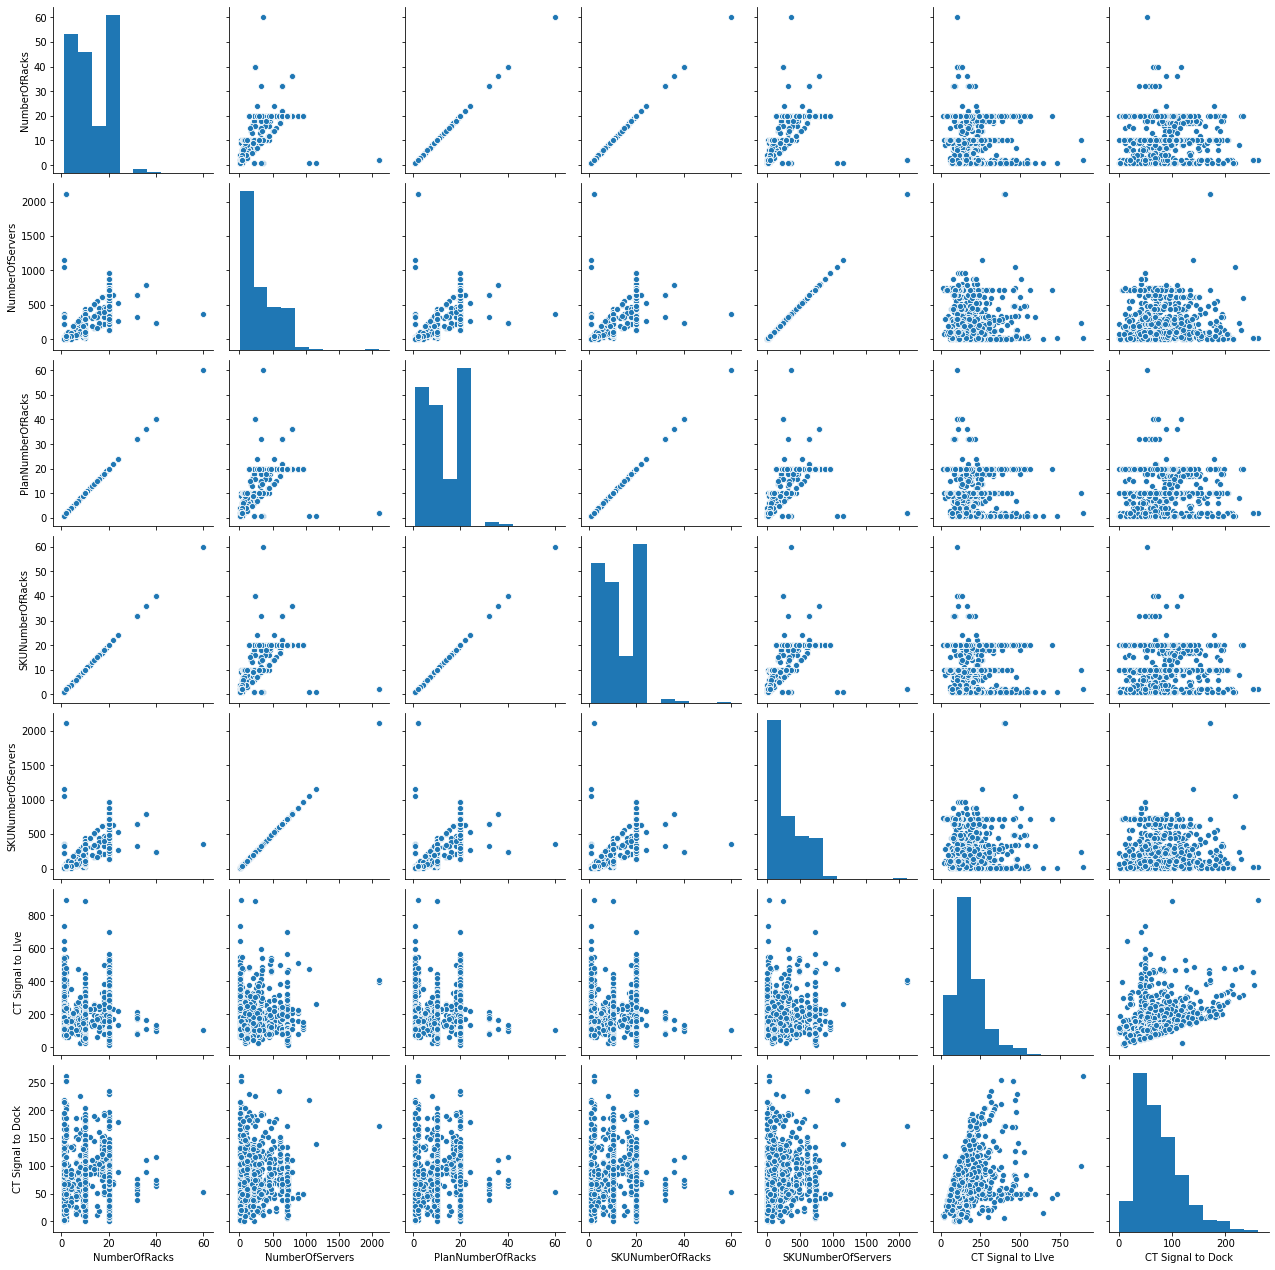

In [19]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df1.select_dtypes(include='int64'))

In [20]:
#NumberOfServers is same as PlanNumberofServers, SKUNumberOfServers
#NumberOfRacks is same as PlanNumberofRacks, SKUNumberOfRacks
#So lets drop these repetaed features 
df1.drop(["PlanNumberOfRacks","SKUNumberOfServers","SKUNumberOfRacks"],axis=1,inplace=True)

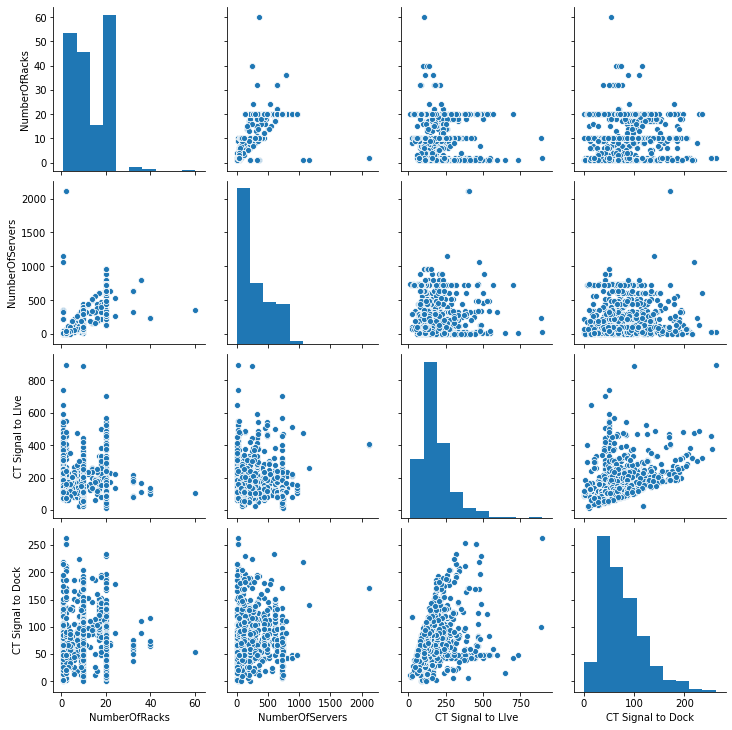

In [21]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df1.select_dtypes(include='int64'))

# Random Forest Regressor 

In [22]:
df2=df1.copy()
df2.shape

(1119, 22)

In [23]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
cat_features=['Region', 'RegionGroup','RegionType', 'IsMainstream','NewRegionFlag', 'NewDCFlag', 'PlanIntentName', 'IsNPI','PlanPropertyGroupName','ProjectCategory','SKUCategoryName','PlanGEO','PlanOrderPriorityName','IsFirstFootprint','IsAddRack','ColoReady At PlanReservationStart Flag']
      
df2[cat_features] = df2[cat_features].apply(le.fit_transform)

In [28]:
df2.tail()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
1232,0,0,1,3,0,0,1,1,21,2,10,110,0,8,3,52,0,0,1,2,57,48
1234,0,0,2,5.0,2,0,1,0,6,8,2,40,9,15,3,28,0,0,0,1,547,49
1235,0,0,2,5.0,2,0,1,0,6,8,1,340,9,15,4,28,0,0,0,3,543,49
1237,0,0,2,5.0,2,0,1,0,21,2,1,320,9,17,4,7,0,1,0,3,593,49
1238,0,0,2,5.0,2,0,1,0,21,2,2,40,9,17,3,15,0,0,0,1,478,49


In [26]:
#Encoding the catogories into String first and then used Label Encoder
d = {0.0:'No',1.0:'Yes'}
df2["ColoReady At PlanReservationStart Flag"] = df2["ColoReady At PlanReservationStart Flag"].replace(d)
df2["IsAddRack"]=df2["IsAddRack"].replace(d)

In [29]:
#lets define our predictors and outcome (Target)
x=df2.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df2["CT Signal to LIve"]

In [47]:
#Lest split our data into Training and testing sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)

In [52]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)

In [53]:
# Lets fit out data to the model
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
# Lets do predictions on out test data
pred=RFR.predict(x_test)

In [34]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [55]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [56]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 74.93142492037674
MAE: 47.3858482656563
r_square: 0.39277975997776604


In [37]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

In [38]:
for feature in zip (x.columns, importances):
    print (feature)

('NewDCFlag', 0.006247356424764178)
('NewRegionFlag', 0.0015721864875649348)
('ColoReady At PlanReservationStart Flag', 0.025298164596954494)
('DeploymentSeverity', 0.08150467956504691)
('IsAddRack', 0.027363847423391895)
('IsFirstFootprint', 0.012993444511390227)
('IsMainstream', 0.00015106980729201583)
('IsNPI', 0.02292736155471087)
('PlanGEO', 0.039995678396827904)
('PlanIntentName', 0.053239927313731464)
('NumberOfRacks', 0.07062604067456103)
('NumberOfServers', 0.19085415177515158)
('PlanOrderPriorityName', 0.08847036073116131)
('PlanPropertyGroupName', 0.09609142881793332)
('ProjectCategory', 0.02186095067892323)
('Region', 0.08606597383361672)
('RegionGroup', 0.02232931053832411)
('RegionType', 0.023204146816226866)
('SKU Avaliable Flag', 0.021666269954574074)
('SKUCategoryName', 0.1075376500978529)


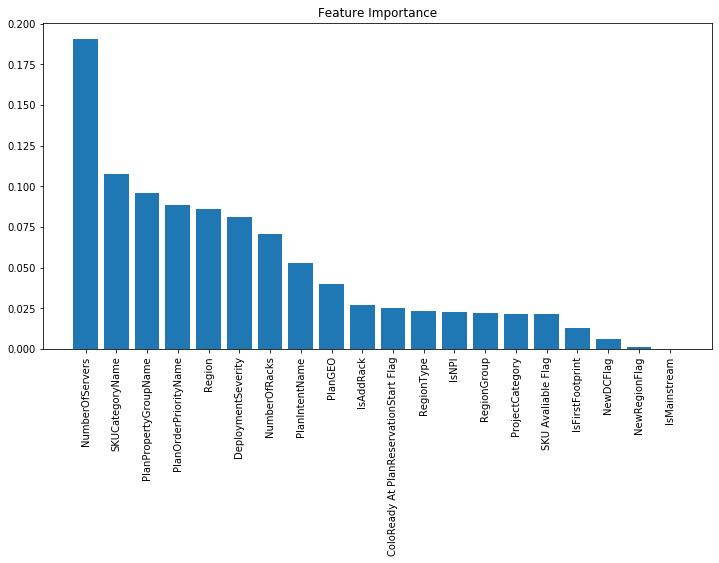

In [39]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [40]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300],
    'max_depth' : [2,3,4,5,6,7,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   26.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [41]:
cv.best_params_

{'max_depth': None, 'n_estimators': 300}

#Taking into account the old data and the New data, we could opt out below featuters 
1. EngineeringGroup
2. NumberOfServers
3. Region /PlanGEO (Broad)
4. SKUCategoryName
5. DeploymentSeverity 
6. NumberOfRacks 
7. PlanIntentName
8. PlanOrderPriorityName
9. PlanResourceTypeName
10. NewDCFlag

In [ ]:
#Lets Try Linear Regression 

In [224]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [237]:
df3=df1.copy()
df3.shape

(1119, 22)

In [250]:
df4=pd.get_dummies(df3, drop_first=True)

In [239]:
df4.head()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock,NewDCFlag_False,NewDCFlag_True,NewRegionFlag_False,NewRegionFlag_True,ColoReady At PlanReservationStart Flag_0.0,ColoReady At PlanReservationStart Flag_1.0,ColoReady At PlanReservationStart Flag_missing,DeploymentSeverity_2.0,DeploymentSeverity_3.0,DeploymentSeverity_4.0,DeploymentSeverity_5.0,IsAddRack_0.0,IsAddRack_1.0,IsAddRack_missing,IsFirstFootprint_False,IsFirstFootprint_True,IsMainstream_Is Mainstream,IsMainstream_Not Mainstream,IsNPI_False,IsNPI_True,PlanGEO_AUSTRALIA,PlanGEO_Asia Pacific,PlanGEO_Brazil,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_Germany,PlanGEO_Germany Gov,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Norway,PlanGEO_South Africa,PlanGEO_Switzerland,PlanGEO_UAE,PlanGEO_USDoD,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United Kingdom (GS),PlanGEO_United States,PlanIntentName_Decomm Complete,PlanIntentName_DecommPair,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Pilot-Prod,PlanIntentName_PilotSecondary,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Staging,PlanIntentName_Test,PlanIntentName_Test-Prod,PlanOrderPriorityName_00-M1 Manual Assignment,PlanOrderPriorityName_11-H1 Top Priority Hot,PlanOrderPriorityName_20-S0 Top Priority Strategic,PlanOrderPriorityName_21-S1 Strategic Initiative,"PlanOrderPriorityName_32-WM2 Storage Mitigate (STD,XIO,ZRS)",PlanOrderPriorityName_35-WM5 Long Term Constraint Mitigate,PlanOrderPriorityName_38-WM8 Other EG Mitigate,PlanOrderPriorityName_41-C1 Customer Commit,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanPropertyGroupName_AzD Bare-Metal,PlanPropertyGroupName_Azure Bare Metal Cray,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure China Compute,PlanPropertyGroupName_Azure China Storage,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute LATAM,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure Federal Compute,PlanPropertyGroupName_Azure Federal Storage,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage LATAM,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure US Gov Compute,PlanPropertyGroupName_Azure US Gov Storage,PlanPropertyGroupName_Azure XIO Storage APAC,PlanPropertyGroupName_Azure XIO Storage Australia,PlanPropertyGroupName_Azure XIO Storage EMEA,PlanPropertyGroupName_Azure XIO Storage Japan,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_BOSG - SPO-S,PlanPropertyGroupName_Cosmos,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_FAST Search,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_PSO KMS,PlanPropertyGroupName_Passport,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,ProjectCategory_Container,ProjectCategory_EngineeringGroupNetwork,ProjectCategory_ITPAC,ProjectCategory_PRD,ProjectCategory_SAN,Region_Australia Central,Region_Australia East,Region_Australia Southeast,Region_Brazil South,Region_Canada Central,Region_Canada East,Region_Central India,Region_Central US,Region_Central US EUAP,Region_China East,Region_China East 2,Region_China North,Region_China North 2,Region_East Asia,Region_East US,Region_East US 2,Region_East US 2 EUAP,Region_France Central,Region_France South,Region_Germany Central,Region_Germany North,Region_Germany NorthEast,Region_Germany West Central,Region_Japan East,Region_Japan West,Region_Korea Central,Region_Korea South,Region_North Central US,Region_North Europe,Region_Norway East,Region_Norway West,Region_South Africa North,Region_South Central US,Region_South India,Region_Southeast Asia,Region_Switzerland North,Region_Switzerland Wes

In [251]:
df4.shape

(1119, 156)

In [252]:
#lets define our predictors and outcome (Target)
x=df4.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df4["CT Signal to LIve"]

In [253]:
#lets split our data into Train and Test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [243]:
y_train.head()

615    118
341    204
749    172
282    143
319    204
Name: CT Signal to LIve, dtype: Int64

In [254]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)

In [255]:
# create and fit a model
lr = sm.OLS(y_train.astype(float),x_train.astype(float))
lr_result=lr.fit()

In [257]:
# print the coefficients
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:      CT Signal to LIve   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     5.552
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           2.54e-48
Time:                        14:33:32   Log-Likelihood:                -4481.3
No. Observations:                 783   AIC:                             9211.
Df Residuals:                     659   BIC:                             9789.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [262]:
# predictions using the model
y_pred_train = lr_result.predict(x_train.astype(float))
y_pred_test = lr_result.predict(sm.add_constant(x_test.astype(float)))

In [273]:
#Error Terms 
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test.astype(float), y_pred_test))
MAE_test = mean_absolute_error(y_test.astype(float), y_pred_test)

In [274]:
#Error Terms and Coefficient of determination
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 74.01757973641233 MAE_train 49.84296584883537
rmse_test : 96.09684858489001 MAE_test 62.21472763601996


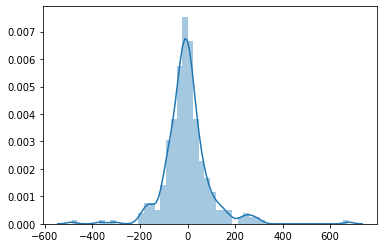

In [266]:
sns.distplot(y_test-y_pred_test)